In [64]:
#Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [6]:
fund_data = pd.read_excel('/Users/manna/Desktop/Thesis_202105/EU_fund_healthcare_cleaned_total.xlsx')
fund_data

,Unnamed: 0,village_name,program_code,id,fund_name,op_code,program_name,applicant_name,tender_title,amount_awarded...11,...,amount_total,advance_payment,amount_awarded...20,amount_awarded2,invoice_payment,end_actual,year_effective,year_decision,type,SC_code
0,1,aba,TIOP-2.1.2-08/1,2283702,EU 2007-2013,TIOP,Kistérségi járóbeteg-szakellátó központok kial...,aba nagykozseg onkormanyzata,Kistérségi Járóbeteg Szakelátó Központ létesít...,795318538,...,NaN,278361488.0,795318538,795318538,465555112.0,NaN,2009,2009,outpatient_care_microregions,85
1,2,abadszalok,ÉAOP-4.1.2/A,1661702,EU 2007-2013,ÉAOP,Egészségügyi szolgáltatások fejlesztése /Kisté...,abadszalok varos onkormanyzata,Orvosi rendelő átalakítása és bővítése Abádsza...,79729216,...,NaN,27712719.0,79729216,79729216,48085909.0,2010-11-29T23:00:00.000Z,2009,2009,primary_care,164
2,3,abaliget,EFOP-1.8.2-17,1596480201,Széchenyi 2020,EFOP,Az alapellátás és népegészségügy rendszerének ...,abaliget kozseg onkormanyzata,Az egészségügy alapellátás fejlesztése Abalige...,110000000,...,123251668.0,110000000.0,110000000,110000000,NaN,NaN,2020,2017,public_health_primary_care,28
3,4,abasar,ÉMOP-4.1.1/A-12,11742102,EU 2007-2013,ÉMOP,"Egészségügyi alapellátás, egészségházak és jár...",abasar kozsegi onkormanyzat,Egészségügyi alapellátás fejlesztése Abasár Kö...,59964596,...,NaN,14991149.0,59964596,59964596,44375904.0,2015-10-29T23:00:00.000Z,2015,2015,primary_outpatient,106
4,5,abaujker,ÉMOP-4.1.1/A,1669302,EU 2007-2013,ÉMOP,Egészségügyi szolgáltatások fejlesztése /Kisté...,kozsegi onkormanyzat abaujker,Orvosi rendelő felújítása Abaújkéren,6976908,...,NaN,546551.0,6976908,6976908,6429883.0,2010-01-13T23:00:00.000Z,2009,2009,primary_care_microregions,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,3150,zomba,EFOP-1.8.2-17,1639320201,Széchenyi 2020,EFOP,Az alapellátás és népegészségügy rendszerének ...,zomba kozseg onkormanyzata,Az egészségügyi alapellátás fejlesztése Zombán...,109573382,...,109573382.0,109573382.0,109573382,109573382,NaN,NaN,2020,2018,public_health_primary_care,170
3150,3151,zsadany,DAOP-4.1.1/C-10,5881802,EU 2007-2013,DAOP,Egészségügyi szolgáltatások fejlesztése / Kist...,zsadany kozseg onkormanyzata,Egészségügyi alapellátás fejlesztése a kistérs...,33136294,...,NaN,1390324.0,33136294,33136294,31618497.0,2012-12-18T23:00:00.000Z,2011,2011,primary_outpatient_marginalized,51
3151,3152,zsadany,TÁMOP-6.1.2.A-14/2,15445002,EU 2007-2013,TÁMOP,Komplex intézményi mozgásprogramok és kapcsoló...,zsadanyi reformatus altalanos iskola,Mozgásprogramok megvalósítása a Zsadányi Refor...,8394070,...,NaN,2098517.0,8394070,8394070,6294540.0,2015-10-28T23:00:00.000Z,2015,2014,health_awareness,51
3152,3153,zsombo,TÁMOP-6.1.2.A-14/2,15453002,EU 2007-2013,TÁMOP,Komplex intézményi mozgásprogramok és kapcsoló...,szent imre katolikus altalanos iskola,Komplex intézményi mozgásprogramok a Szent Imr...,10239716,...,NaN,2559929.0,10239716,10239716,7679787.0,2015-08-29T23:00:00.000Z,2015,2014,health_awareness,74


In [8]:
fund_data["amount_awarded2"].sum()  #(apprx. 755 737 050 279 HUF, 3154 projects, 153 health-related programs
fund_data.shape

(3154, 26)

In [9]:
fund_data["amount_awarded2"].describe()

count    3.154000e+03
mean     2.396123e+08
std      1.090967e+09
min      1.856243e+06
25%      9.996800e+06
50%      3.325459e+07
75%      8.202788e+07
max      2.160200e+10
Name: amount_awarded2, dtype: float64

In [190]:
type_dict = {'IT': 'e-health',
'IT_NHC': 'e-health',
'IT_national':'e-health',
'blood':'Special focus area',
'dentistry':'Other',
'emergency':'Special focus area',
'emergency_ambulance':'Special focus area',
'equipment':'Equipment',
'health_awareness':'Public health & health awareness',
'health_awareness_infrastructure':'Public health & health awareness',
'home_care':'Other',
'human_resource':'Human resource',
'infection_controll':'Special focus area',
'infrastructure':'Infrastructure (inpatient care)',
'infrastructure_energetic':'Infrastructure (inpatient care)',
'marginalized':'Infrastructure (inpatient care)',
'methodological_development':'Research',
'neunatology':'Special focus area',
'oncology':'Special focus area',
'outpatient_care':'Outpatient care',
'outpatient_care_microregions':'Outpatient care',
'outpatient_microregions':'Outpatient care',
'patient_law':'Other',
'primary_care':'Primary care',
'primary_care_microregions':'Primary care',
'primary_care_social_microregions':'Primary care',
'primary_outpatient':'Primary care & outpatient care',
'primary_outpatient_marginalized':'Primary care',
'psychiatry':'Special focus area',
'public_health':'Public health & health awareness',
'public_health_mental':'Public health & health awareness',
'public_health_primary_care':'Public health & health awareness',
'public_health_screening':'Public health & health awareness',
'rehabilitation':'Special focus area',
'research_human_resource':'Research',
'reserach':'Research',
'structural':'Infrastructure (inpatient care)',
'structural_access':'Infrastructure (inpatient care)',
'structural_infrastructure':'Infrastructure (inpatient care)',
'structural_oncology':'Special focus area',
'structural_outpatient':'Outpatient care',            
            }

In [191]:
fund_data['type_cat'] = fund_data['type'].map(type_dict)
fund_data

,Unnamed: 0,village_name,program_code,id,fund_name,op_code,program_name,applicant_name,tender_title,amount_awarded...11,...,advance_payment,amount_awarded...20,amount_awarded2,invoice_payment,end_actual,year_effective,year_decision,type,SC_code,type_cat
0,1,aba,TIOP-2.1.2-08/1,2283702,EU 2007-2013,TIOP,Kistérségi járóbeteg-szakellátó központok kial...,aba nagykozseg onkormanyzata,Kistérségi Járóbeteg Szakelátó Központ létesít...,795318538,...,278361488.0,795318538,795318538,465555112.0,NaN,2009,2009,outpatient_care_microregions,85,Outpatient care
1,2,abadszalok,ÉAOP-4.1.2/A,1661702,EU 2007-2013,ÉAOP,Egészségügyi szolgáltatások fejlesztése /Kisté...,abadszalok varos onkormanyzata,Orvosi rendelő átalakítása és bővítése Abádsza...,79729216,...,27712719.0,79729216,79729216,48085909.0,2010-11-29T23:00:00.000Z,2009,2009,primary_care,164,Primary care
2,3,abaliget,EFOP-1.8.2-17,1596480201,Széchenyi 2020,EFOP,Az alapellátás és népegészségügy rendszerének ...,abaliget kozseg onkormanyzata,Az egészségügy alapellátás fejlesztése Abalige...,110000000,...,110000000.0,110000000,110000000,NaN,NaN,2020,2017,public_health_primary_care,28,Public health & health awareness
3,4,abasar,ÉMOP-4.1.1/A-12,11742102,EU 2007-2013,ÉMOP,"Egészségügyi alapellátás, egészségházak és jár...",abasar kozsegi onkormanyzat,Egészségügyi alapellátás fejlesztése Abasár Kö...,59964596,...,14991149.0,59964596,59964596,44375904.0,2015-10-29T23:00:00.000Z,2015,2015,primary_outpatient,106,Primary care & outpatient care
4,5,abaujker,ÉMOP-4.1.1/A,1669302,EU 2007-2013,ÉMOP,Egészségügyi szolgáltatások fejlesztése /Kisté...,kozsegi onkormanyzat abaujker,Orvosi rendelő felújítása Abaújkéren,6976908,...,546551.0,6976908,6976908,6429883.0,2010-01-13T23:00:00.000Z,2009,2009,primary_care_microregions,57,Primary care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,3150,zomba,EFOP-1.8.2-17,1639320201,Széchenyi 2020,EFOP,Az alapellátás és népegészségügy rendszerének ...,zomba kozseg onkormanyzata,Az egészségügyi alapellátás fejlesztése Zombán...,109573382,...,109573382.0,109573382,109573382,NaN,NaN,2020,2018,public_health_primary_care,170,Public health & health awareness
3150,3151,zsadany,DAOP-4.1.1/C-10,5881802,EU 2007-2013,DAOP,Egészségügyi szolgáltatások fejlesztése / Kist...,zsadany kozseg onkormanyzata,Egészségügyi alapellátás fejlesztése a kistérs...,33136294,...,1390324.0,33136294,33136294,31618497.0,2012-12-18T23:00:00.000Z,2011,2011,primary_outpatient_marginalized,51,Primary care
3151,3152,zsadany,TÁMOP-6.1.2.A-14/2,15445002,EU 2007-2013,TÁMOP,Komplex intézményi mozgásprogramok és kapcsoló...,zsadanyi reformatus altalanos iskola,Mozgásprogramok megvalósítása a Zsadányi Refor...,8394070,...,2098517.0,8394070,8394070,6294540.0,2015-10-28T23:00:00.000Z,2015,2014,health_awareness,51,Public health & health awareness
3152,3153,zsombo,TÁMOP-6.1.2.A-14/2,15453002,EU 2007-2013,TÁMOP,Komplex intézményi mozgásprogramok és kapcsoló...,szent imre katolikus altalanos iskola,Komplex intézményi mozgásprogramok a Szent Imr...,10239716,...,2559929.0,10239716,10239716,7679787.0,2015-08-29T23:00:00.000Z,2015,2014,health_awareness,74,Public health & health awareness


In [192]:
#sum mean and number of the awarded grants by the four support scheme categories

sum_scheme = fund_data.groupby("type_cat")["amount_awarded2"].sum()
sum_scheme = sum_scheme/1000000000
sum_scheme = pd.DataFrame(sum_scheme)
sum_scheme.index.name = 'type_cat'
sum_scheme.reset_index(inplace=True)
sum_scheme


,type_cat,amount_awarded2
0,Equipment,42.560539
1,Human resource,36.042024
2,Infrastructure (inpatient care),365.350012
3,Other,8.972786
4,Outpatient care,56.153115
5,Primary care,18.573406
6,Primary care & outpatient care,14.615645
7,Public health & health awareness,57.944493
8,Research,12.880000
9,Special focus area,87.628065


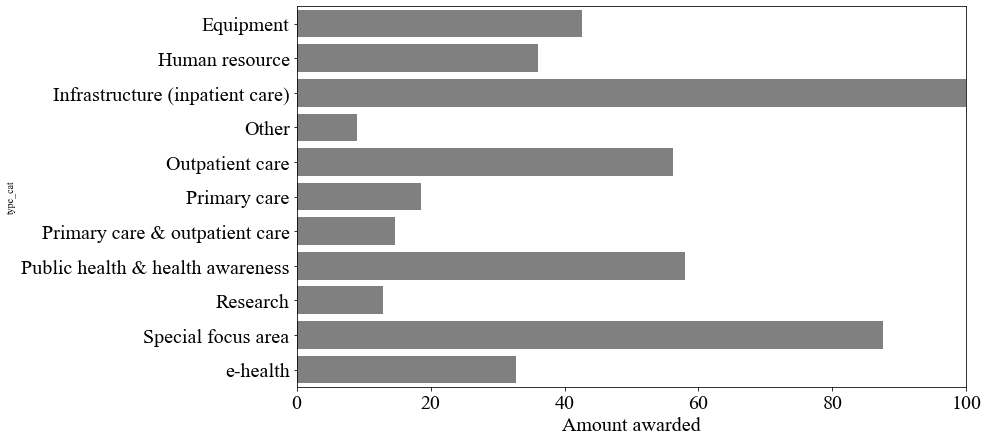

In [195]:

font = {'fontname':'Times New Roman'}
method_plot =plt.figure(figsize=(12,7))
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams["font.family"] = "Times New Roman"
plt.xlim(0, 100)
method_plot = sns.barplot(y ='type_cat', x='amount_awarded2', color ='gray', data = sum_scheme)
plt.xlabel('Amount awarded',fontsize=20, **font)
method_plot.figure.savefig('/Users/manna/Desktop/Thesis_202105/EU_funds_type.jpeg', bbox_inches='tight', dpi=600)

In [166]:
#sum of the awarded grants by year of decision

sum_year = fund_data.groupby("year_decision")["amount_awarded2"].sum()
#mean_scheme = fund_data.groupby("type_cat")["year_decision"].mean()
#count_scheme = fund_data.groupby("type_cat")["year_decision"].count()
sum_year = sum_year/1000000000
sum_year = pd.DataFrame(sum_year)
sum_year.index.name = 'year'
sum_year.reset_index(inplace=True)
sum_year
#print(mean_scheme)
#print(count_scheme)

,year,amount_awarded2
0,2004,22.244363
1,2005,2.373025
2,2007,4.698128
3,2008,31.379561
4,2009,127.503186
5,2010,74.204748
6,2011,75.854087
7,2012,56.033222
8,2013,84.632282
9,2014,27.386716


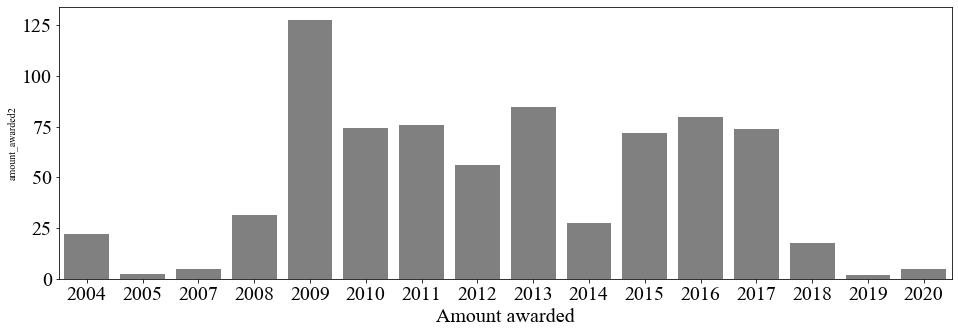

In [171]:
font = {'fontname':'Times New Roman'}
method_plot =plt.figure(figsize=(16,5))
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams["font.family"] = "Times New Roman"
plt.xlim(0, 100000)
method_plot = sns.barplot(y ='amount_awarded2', x= 'year', color ='gray', data = sum_year)
plt.xlabel('Amount awarded',fontsize=20, **font)
#plt.ylabel('Model type/design',fontsize=14, **font)
method_plot.figure.savefig('/Users/manna/Desktop/Thesis_202105/EU_funds_year.jpeg', bbox_inches='tight', dpi=600)

In [176]:
#sum of the awarded grants by year of decision

sum_sc = fund_data.groupby("SC_code")["amount_awarded2"].sum()
#mean_scheme = fund_data.groupby("type_cat")["year_decision"].mean()
#count_scheme = fund_data.groupby("type_cat")["year_decision"].count()
sum_sc = sum_sc/1000000000
sum_sc = pd.DataFrame(sum_sc)
sum_sc.index.name = 'sc'
sum_sc.reset_index(inplace=True)
sum_sc.head(50)
#print(mean_scheme)
#print(count_scheme)

,sc,amount_awarded2
0,100,0.763254
1,101,1.580000
2,102,0.412835
3,103,0.209255
4,104,9.177773
5,105,0.724746
6,106,8.639896
7,107,1.896682
8,108,4.291712
9,109,1.441084


In [199]:
largest = sum_sc.nlargest(16, 'amount_awarded2' )
largest.to_excel("largest.xlsx", sheet_name='Sheet1')  

In [200]:
smallest = sum_sc.nsmallest(15, 'amount_awarded2' )
smallest.to_excel("smallest.xlsx", sheet_name='Sheet1')

In [152]:
import geojson
with open('/Users/manna/Desktop/export.geojson') as f:
    gj = geojson.load(f)   

In [154]:
gj

{"copyright": "The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.", "features": [{"geometry": {"coordinates": [[[19.073628, 47.40326], [19.074969, 47.403951], [19.075237, 47.404069], [19.076139, 47.404169], [19.0784, 47.404406], [19.079491, 47.404512], [19.080747, 47.40465], [19.08359, 47.404866], [19.085233, 47.401689], [19.08756, 47.398831], [19.091609, 47.393921], [19.092652, 47.392575], [19.093948, 47.391071], [19.095519, 47.390435], [19.105317, 47.387047], [19.107742, 47.389978], [19.108932, 47.393057], [19.109045, 47.393989], [19.109143, 47.394798], [19.108797, 47.396447], [19.104882, 47.402046], [19.100104, 47.413112], [19.099165, 47.414556], [19.098204, 47.416033], [19.094308, 47.420176], [19.092968, 47.422532], [19.092741, 47.423368], [19.092236, 47.425266], [19.091731, 47.427079], [19.091487, 47.427953], [19.091318, 47.428505], [19.089952, 47.431744], [19.088916, 47.433678], [19.088263, 47.438754], [19.08789, 47.439958], [

In [153]:
ids=[]
for p_id in gj:
    ids.append((p_id['id'], p_id['name']))
print(ids)

TypeError: string indices must be integers

In [155]:
for p_id in gj:
        u_id = p_id.get('id')
        u_name = p_id.get('name')

AttributeError: 'str' object has no attribute 'get'

In [151]:
pip install geojson

Note: you may need to restart the kernel to use updated packages.


In [141]:
import geopandas as gpd
import geoplot as gplt

ModuleNotFoundError: No module named 'geoplot'

In [143]:
pip install geoplot

  Using cached geoplot-0.4.1-py3-none-any.whl (28 kB)
  Using cached contextily-1.1.0-py3-none-any.whl (24 kB)
  Using cached Cartopy-0.19.0.post1.tar.gz (12.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached mapclassify-2.4.2-py3-none-any.whl (38 kB)
  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
  Using cached rasterio-1.2.3-cp37-cp37m-macosx_10_9_x86_64.whl (20.5 MB)
  Using cached geopy-2.1.0-py3-none-any.whl (112 kB)
  Using cached mercantile-1.2.1-py3-none-any.whl (14 kB)
  Using cached geographiclib-1.50-py3-none-any.whl (38 kB)
  Using cached affine-2.3.0-py2.py3-none-any.whl (15 kB)
  Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
  ERROR: Command errored out with exit status 1:
   command: //anaconda3/bin/python //anaconda3/lib/python3.7/site-packages/pip/_vendor/pep517/in_process/_in_process.py build_wheel /var/folders/4t/4mnhj98914x8c8hbb1xd58980000gn/T/tmpaexysevc

Note: you may need to restart the kernel to use updated packages.


In [132]:
pip install geopandas


     |████████████████████████████████| 1.0MB 3.9MB/s eta 0:00:01     |██████████████████▌             | 573kB 3.9MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 23.5MB/s eta 0:00:01
     |████████████████████████████████| 19.3MB 16.4MB/s eta 0:00:01
     |████████████████████████████████| 7.5MB 20.6MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [106]:
pip install pyshp

Note: you may need to restart the kernel to use updated packages.


In [107]:
import shapefile

In [116]:
sf = shapefile.Reader("/Users/manna/Desktop/Thesis_202105/DATA/admin7.shp")

In [117]:
sf.shapeType

5

In [118]:
sf.shapeType == shapefile.POLYGON

True

In [119]:
len(sf)

175

In [124]:
s = sf.shape(7)
s

In [125]:
pip install geoplotlib

  Stored in directory: /Users/manna/Library/Caches/pip/wheels/c1/66/6f/0004f2792164ceeacf6ec80766530cbc44555bf8e64c397d80
Successfully built geoplotlib
Note: you may need to restart the kernel to use updated packages.


In [122]:
sf.__geo_interface__['type']
'FeatureCollection'

ShapefileException: Shapefile Reader requires a shapefile or file-like object. (no dbf file found)

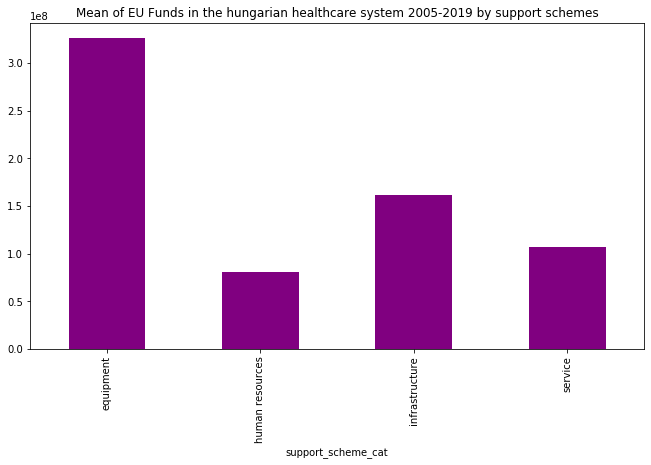

In [397]:
#Mean of EU Funds in the hungarian healthcare system 2005-2019 by support schemes
figure_mean = mean_scheme.plot(kind='bar', figsize=(11,6),
                          title='Mean of EU Funds in the hungarian healthcare system 2005-2019 by support schemes',
                          color = "purple");

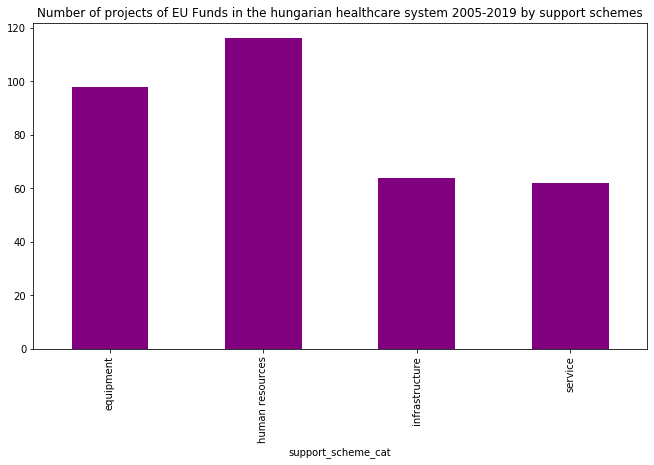

In [398]:
#Number of projects of EU Funds in the hungarian healthcare system 2005-2019 by support schemes
figure_count = count_scheme.plot(kind='bar', figsize=(11,6),
                          title='Number of projects of EU Funds in the hungarian healthcare system 2005-2019 by support schemes',
                          color = "purple");

#### 3.2. Time

<br><br>__Most important findings__: Results confirm the government's aim that they tried to outsource majority of EU Funds before the national elections in 2018. The highest number of projects were awarded between 2015-2017, with almost 100 projects in the peak year, 2017. The sum of awarded grants peaks in 2015 with about 30 billion forints, so nearly half of the total EU Funds into the hungarian healthcare arrived in this year. The mean of awarded grants was the actual highest* in 2015 as well with about 450 million forints to each projects.
<br>
<br>
 *technically the mean of awarded grants was the highest in 2008, but that data related to only one hospital (Szent Imre Hospital in Budapest) which received a grant of around 800 million forints that year.

In [399]:
#Extracting year
#I need only the year of the desicion, so I should extract year only from decision data
row_data5.decision_date = pd.to_datetime(row_data5.decision_date, format="%Y-%m-%d")
row_data5['decision_year'] = row_data5['decision_date'].dt.year
#row_data5

In [400]:
#sum mean and number of the awarded grants by years
sum_year = row_data5.groupby("decision_year")["grant_awarded"].sum()
mean_year = row_data5.groupby("decision_year")["grant_awarded"].mean()
count_year = row_data5.groupby("decision_year")["grant_awarded"].count()

print(sum_year)
print(mean_year) 
print(count_year)

decision_year
2008      812019991
2009     2749063300
2010      891937406
2011       37014207
2012     2926373068
2014      130000000
2015    31618000549
2017    11644138720
2018     7018769265
2019      615925469
2020      549037537
Name: grant_awarded, dtype: int64
decision_year
2008         812,019,991.00
2009         161,709,605.88
2010          40,542,609.36
2011          37,014,207.00
2012          71,374,952.88
2014         130,000,000.00
2015         458,231,892.01
2017         117,617,562.83
2018          97,482,906.46
2019          34,218,081.61
2020          32,296,325.71
Name: grant_awarded, dtype: float64
decision_year
2008     1
2009    17
2010    22
2011     1
2012    41
2014     1
2015    69
2017    99
2018    72
2019    18
2020    17
Name: grant_awarded, dtype: int64


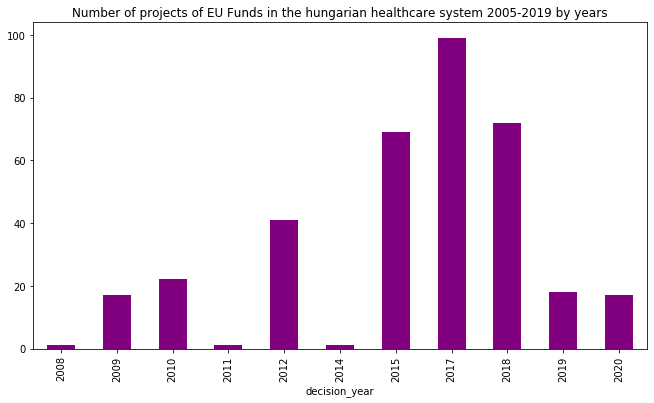

In [401]:
#Number of projects of EU Funds in the hungarian healthcare system 2005-2019 by years
figure_count_year = count_year.plot(kind='bar', figsize=(11,6),
                          title='Number of projects of EU Funds in the hungarian healthcare system 2005-2019 by years',
                          color = "purple");

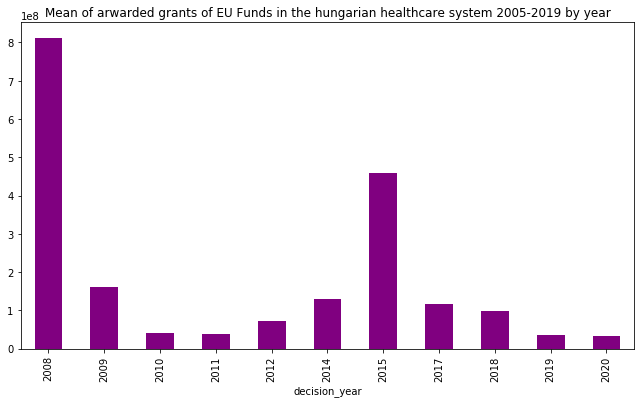

In [402]:
#Mean of arwarded grants of EU Funds in the hungarian healthcare system 2005-2019 by year
figure_mean_year = mean_year.plot(kind='bar', figsize=(11,6),
                          title='Mean of arwarded grants of EU Funds in the hungarian healthcare system 2005-2019 by year',
                          color = "purple");

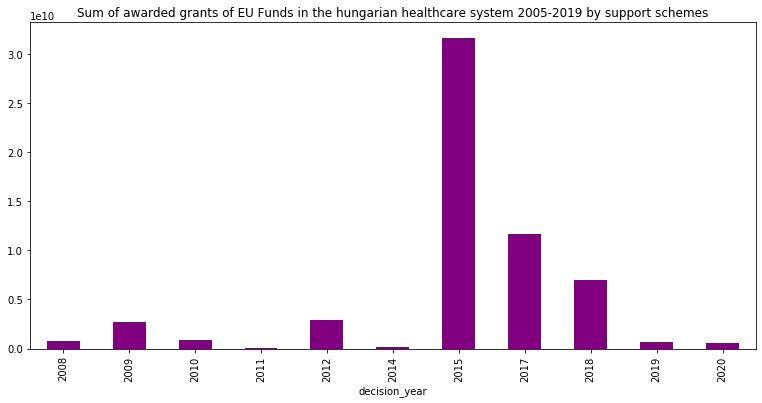

In [403]:
#Sum of awarded grants of EU Funds in the hungarian healthcare system 2005-2019 by support schemes
figure_sum_year = sum_year.plot(kind='bar', figsize=(13,6),
                          title='Sum of awarded grants of EU Funds in the hungarian healthcare system 2005-2019 by support schemes',
                          color = "purple");

#### 3.3. Location
<br>__Most important findings__: If we concentrate on villages, the five top cities are the following in terms of largest Fund receivers: Budapest (about 12 billion forints), Vác (about 2,6 billion forints), Miskolc, Szombathely and Győr. In terms of mean amount of grants: Vác, Cegléd, Kisvárda, Tatabánya and Budapest. In terms of number of projects awarded: Budapest, Miskolc, Győr, Szolnok and Zalaegerszeg. We can see that the most developed Budapest has benefited the most out of the Funds, and more developed western-cities are higly represented. (Which is against the most important aim of Funds regarding decreasing regional inequalities).
<br> If we compare counties, we also see this tendency that western-counties are over represented among the top 5 in the sum and the mean of the grants, least developed eastern and northern counties are highly represented in the top 5 by the number of projects. It is very likely that more human-resource development projects were targetted to this regions (in some of the cases these programs directly providing scholarships to medical personnel in order to "keep" them their). I will check in my thesis whether these programs were able to decrease shortage of medical personnel.

In [404]:
#1 Cities
#check the number of unique values
row_data5.location.unique()
row_data5['location'].nunique() #75 cities recieved grants

75

In [405]:
#sum mean and number of the awarded grants by years
sum_village = row_data5.groupby("location")["grant_awarded"].sum()
mean_village = row_data5.groupby("location")["grant_awarded"].mean()
count_village = row_data5.groupby("location")["grant_awarded"].count()

print(sum_village)
print(mean_village) 
print(count_village)

location
Ajka                         262551861
Baja                         277600143
Balassagyarmat               326643830
Balatonfüred                 400004217
Berettyóújfalu               529262006
Bonyhád                       40000000
Budapest                   11655164010
Békéscsaba                   361344440
Cegléd                      1452408528
Csorna                       362640073
Debrecen                    1087806943
Deszk                        192390121
Dombóvár                     616186824
Dunaújváros                  641868592
Edelény                      424498990
Eger                         886977447
Esztergom                   1235619469
Fehérgyarmat                 132944486
Gyula                       1143089352
Gyöngyös                     668864381
Győr                        1968102570
Harkány                      406002835
Hatvan                       905581014
Heves                         83792145
Hévíz                        186281717
Jászberény      

In [406]:
#the 5 biggest is more comprehendable in each categories

largest5_sum = sum_village.nlargest(5)
largest5_mean = mean_village.nlargest(5)
largest5_count = count_village.nlargest(5)

print(largest5_sum)
print(largest5_mean)
print(largest5_count)

location
Budapest       11655164010
Vác             2665200374
Miskolc         2354922212
Szombathely     2032316294
Győr            1968102570
Name: grant_awarded, dtype: int64
location
Vác               666,300,093.50
Cegléd            484,136,176.00
Kisvárda          445,740,538.00
Tatabánya         392,936,283.50
Budapest          315,004,432.70
Name: grant_awarded, dtype: float64
location
Budapest        37
Miskolc         12
Győr            10
Szolnok         10
Zalaegerszeg    10
Name: grant_awarded, dtype: int64


In [407]:
#2. Counties

#the location data is more meaningful in the county context, so I am going merge it with the official county-list 
#of the Hungarian Office of Central Statistics available here: http://www.ksh.hu/apps/hntr.egyeb?p_lang=HU&p_sablon=LETOLTES

county_data = pd.read_excel (r'hnt_letoltes_2019_2.xls', sheet_name='Helységek 2019. 01. 01.')
#print (county_data)

#creating a dictionary for the villages and the counties
county_dict = pd.Series(county_data.county.values,index=county_data.village).to_dict()
county_dict

{'Aba': 'Fejér',
 'Abádszalók': 'Jász-Nagykun-Szolnok',
 'Abaliget': 'Baranya',
 'Abasár': 'Heves',
 'Abaújalpár': 'Borsod-Abaúj-Zemplén',
 'Abaújkér': 'Borsod-Abaúj-Zemplén',
 'Abaújlak': 'Borsod-Abaúj-Zemplén',
 'Abaújszántó': 'Borsod-Abaúj-Zemplén',
 'Abaújszolnok': 'Borsod-Abaúj-Zemplén',
 'Abaújvár': 'Borsod-Abaúj-Zemplén',
 'Abda': 'Győr-Moson-Sopron',
 'Abod': 'Borsod-Abaúj-Zemplén',
 'Abony': 'Pest',
 'Ábrahámhegy': 'Veszprém',
 'Ács': 'Komárom-Esztergom',
 'Acsa': 'Pest',
 'Acsád': 'Vas',
 'Acsalag': 'Győr-Moson-Sopron',
 'Ácsteszér': 'Komárom-Esztergom',
 'Adács': 'Heves',
 'Ádánd': 'Somogy',
 'Adásztevel': 'Veszprém',
 'Adony': 'Fejér',
 'Adorjánháza': 'Veszprém',
 'Adorjás': 'Baranya',
 'Ág': 'Baranya',
 'Ágasegyháza': 'Bács-Kiskun',
 'Ágfalva': 'Győr-Moson-Sopron',
 'Aggtelek': 'Borsod-Abaúj-Zemplén',
 'Agyagosszergény': 'Győr-Moson-Sopron',
 'Ajak': 'Szabolcs-Szatmár-Bereg',
 'Ajka': 'Veszprém',
 'Aka': 'Komárom-Esztergom',
 'Akasztó': 'Bács-Kiskun',
 'Alacska': 'Borsod-A

In [408]:
#adding a new country columns to the original dataframe
row_data5['county'] = row_data5['location'].map(county_dict)
row_data5

,support_scheme,beneficiary_name,operation_name,location,decision_date,operation_summary,grant_awarded,fund,country,intervention,co-financing_rate,total_expenditure,start_date,end_date,support_scheme_cat,decision_year,county
0,efop-1.10.2-17 - egészségügyi humánerőforrás-f...,bács-kiskun megyei kórház a szegedi tudományeg...,Egészségügyi humánerőforrás-fejlesztés,Kecskemét,2017-12-19,https://palyazat.gov.hu/tamogatott_projektkere...,148740458,ESZA,Magyarország,"A megfizethető, fenntartható és minőségi szol...","84,999984 - ESZA",148740458,2017.07.01,2019.01.31,human resources,2017,Bács-Kiskun
1,efop-1.10.2-17 - egészségügyi humánerőforrás-f...,bajai szent rókus kórház,Bajai Szent Rókus Kórház humánerőforrás-fejles...,Baja,2018-01-10,https://palyazat.gov.hu/tamogatott_projektkere...,149415000,ESZA,Magyarország,"A megfizethető, fenntartható és minőségi szol...","84,999999 - ESZA",149415000,2017.04.18,2019.08.17,human resources,2018,Bács-Kiskun
2,efop-1.10.4-18 - egészségügyi ösztöndíjak támo...,bajai szent rókus kórház,Szakképzés megszerzésére irányuló támogatási p...,Baja,2019-08-29,https://palyazat.gov.hu/tamogatott_projektkere...,5259696,ESZA,Magyarország,NaN,"85,000008 - ESZA",5259696,2019.06.01,2021.12.31,human resources,2019,Bács-Kiskun
105,efop-1.8.20-17 - az alapellátás és népegészség...,bajai szent rókus kórház,Lelki egészség programok a bajai EFI-ben,Baja,2018-02-07,https://palyazat.gov.hu/tamogatott_projektkere...,39966640,ESZA,Magyarország,"A megfizethető, fenntartható és minőségi szol...","84,99999 - ESZA",39966640,2018.03.01,2020.02.29,service,2018,Bács-Kiskun
107,efop-1.8.20-17 - az alapellátás és népegészség...,kiskunhalasi semmelweis kórház,Egészségfejlesztési iroda mentális funkcióval ...,Kiskunhalas,2018-03-29,https://palyazat.gov.hu/tamogatott_projektkere...,40000000,ESZA,Magyarország,"A megfizethető, fenntartható és minőségi szol...",85 - ESZA,40000000,2018.06.01,2020.05.31,service,2018,Bács-Kiskun
159,efop-2.2.18-17 - betegbiztonság növelését célz...,bajai szent rókus kórház,A Bajai Szent Rókus Kórház betegbiztonság növe...,Baja,2017-09-07,https://palyazat.gov.hu/tamogatott_projektkere...,62075996,ERFA,Magyarország,"Egészségügyi infrastruktúra, Humán-egészségüg...","84,999993 - ERFA",199998440,2017.10.01,2018.09.30,infrastructure,2017,Bács-Kiskun
160,efop-2.2.18-17 - betegbiztonság növelését célz...,bács-kiskun megyei kórház a szegedi tudományeg...,Betegbiztonság növelését célzó komplex infrast...,Kecskemét,2017-09-07,https://palyazat.gov.hu/tamogatott_projektkere...,197490003,ERFA,Magyarország,"Egészségügyi infrastruktúra, Humán-egészségüg...","84,999997 - ERFA",199190752,2017.10.01,2019.02.28,infrastructure,2017,Bács-Kiskun
161,efop-2.2.18-17 - betegbiztonság növelését célz...,kiskunhalasi semmelweis kórház,Betegbiztonság növelését célzó komplex infrast...,Kiskunhalas,2017-09-07,https://palyazat.gov.hu/tamogatott_projektkere...,173342556,ERFA,Magyarország,"Egészségügyi infrastruktúra, Humán-egészségüg...","84,999999 - ERFA",199999608,2017.10.13,2019.03.31,infrastructure,2017,Bács-Kiskun
163,efop-2.2.20-17 - az egészségügyi ellátórendsze...,kiskunhalasi semmelweis kórház,A Kiskunhalasi Semmelweis Kórház orvostechnika...,Kiskunhalas,2019-04-30,https://palyazat.gov.hu/tamogatott_projektkere...,30870498,ERFA,Magyarország,"Egészségügyi infrastruktúra, Humán-egészségüg...","84,999986 - ERFA",49999982,2019.05.03,2020.04.30,equipment,2019,Bács-Kiskun
164,efop-2.2.20-17 - az egészségügyi ellátórendsze...,bajai szent rókus kórház,Az egészségügyi ellátórendszer orvostechnikai ...,Baja,2017-12-04,https://palyazat.gov.hu/tamogatott_projektkere...,20882811,ERFA,Magyarország,"Egészségügyi infrastruktúra, Humán-egészségüg...","84,999979 - ERFA",49894310,2018.11.01,2019.02.28,equipment,2017,Bács-Kiskun


In [409]:
#sum mean and number of the awarded grants by counties
sum_county = row_data5.groupby("county")["grant_awarded"].sum()
mean_county = row_data5.groupby("county")["grant_awarded"].mean()
count_county = row_data5.groupby("county")["grant_awarded"].count()

print(sum_county)
print(mean_county) 
print(count_county)

county
Baranya                   1699925303
Borsod-Abaúj-Zemplén      4122547556
Bács-Kiskun               2489398439
Békés                     2520207769
Csongrád                   872814673
Fejér                     1770810909
Győr-Moson-Sopron         3943064802
Hajdú-Bihar               1617068949
Heves                     2545214987
Jász-Nagykun-Szolnok      1322969300
Komárom-Esztergom         2920660865
Nógrád                    1959596315
Pest                      4434547782
Somogy                    1642560372
Szabolcs-Szatmár-Bereg    3240490818
Tolna                     1412113934
Vas                       3171843523
Veszprém                  2401990438
Zala                      2827386114
Name: grant_awarded, dtype: int64
county
Baranya                        106,245,331.44
Borsod-Abaúj-Zemplén           164,901,902.24
Bács-Kiskun                    138,299,913.28
Békés                          157,512,985.56
Csongrád                        96,979,408.11
Fejér              

In [410]:
#Top 5 counties by sum of grants awarded
largest5_sum_county = sum_county.nlargest(5)
largest5_sum_county

county
Pest                      4434547782
Borsod-Abaúj-Zemplén      4122547556
Győr-Moson-Sopron         3943064802
Szabolcs-Szatmár-Bereg    3240490818
Vas                       3171843523
Name: grant_awarded, dtype: int64

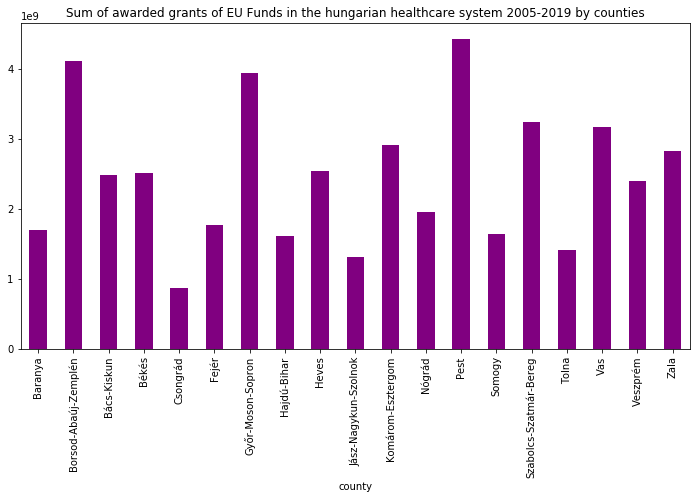

In [411]:
#Sum of awarded grants of EU Funds in the hungarian healthcare system 2005-2019 by counties
figure_count_county = sum_county.plot(kind='bar', figsize=(12,6),
                          title='Sum of awarded grants of EU Funds in the hungarian healthcare system 2005-2019 by counties',
                          color = "purple");

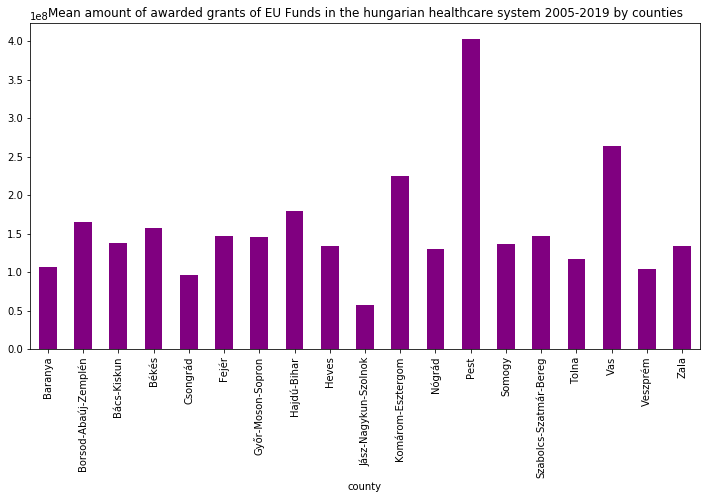

In [412]:
#Mean amount of awarded grants of EU Funds in the hungarian healthcare system 2005-2019 by counties'
figure_count_county = mean_county.plot(kind='bar', figsize=(12,6),
                          title='Mean amount of awarded grants of EU Funds in the hungarian healthcare system 2005-2019 by counties',
                          color = "purple");

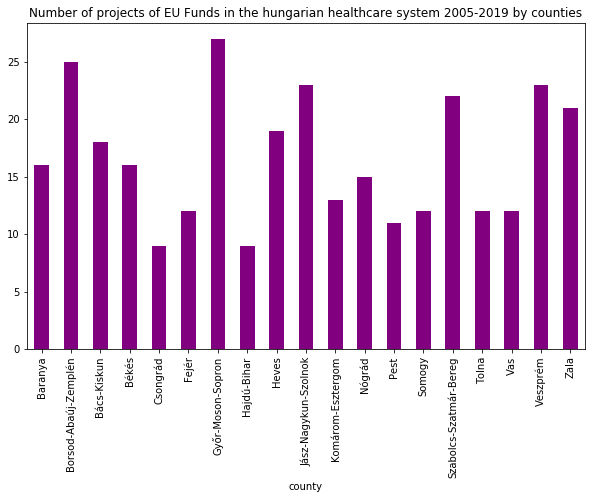

In [413]:
#Number of projects of EU Funds in the hungarian healthcare system 2005-2019 by counties
figure_count_county = count_county.plot(kind='bar', figsize=(10,6),
                          title='Number of projects of EU Funds in the hungarian healthcare system 2005-2019 by counties',
                          color = "purple");

#### 3.4. Multiple tables and plots (across schemes, time and location)
<br>__Most important findings__: It was hard to create easily comprehensible results by tables and two-dimensional-graphs. The graphs confirm the tendencies I mentioned in the previous sections: <br>1. The highest amount of grants were allocated between 2015-2017, <br>2. The less developed counties did not received grants based on their needs, <br>3. A vast majority of the grants were spent on equipment development, and a great portion of it was allocated in 2015.

<br>__Planned additional visualizations for my thesis based on the experiences of this project__: <br>1. I would like to plot the data by sub-counties (counties are consits of sub-counties ((járás)) and there are 173 of them). I did not manage to do it now as I had problems with the coordinates, and I did not find a bulit-in package for Hungary. <br>2. I would like to create interactive, tableau-like plots for a better visibility, which have two axis (county and scheme for example) and a filter for year (or another third variable) which can be selected and changed by the reader. 

In [414]:
#sum mean and number of the awarded grants by time and locatoin
sum_county_year = row_data5.groupby(["decision_year", "county"])["grant_awarded"].sum()
mean_county_year = row_data5.groupby(["county", "decision_year"])["grant_awarded"].mean()
count_county_year = row_data5.groupby(["county", "decision_year"])["grant_awarded"].count()

print(sum_county_year)
print(mean_county_year) 
print(count_county_year)

decision_year  county                
2008           Vas                        812019991
2009           Borsod-Abaúj-Zemplén        96993160
               Bács-Kiskun                 49512100
               Békés                       59999335
               Csongrád                    13032334
               Győr-Moson-Sopron           97808060
               Hajdú-Bihar                 44800846
               Komárom-Esztergom           49996280
               Nógrád                      49697860
               Pest                      2116366721
               Veszprém                    45666032
               Zala                        25571720
2010           Baranya                     49714440
               Borsod-Abaúj-Zemplén        99199250
               Bács-Kiskun                 46218547
               Fejér                       44369500
               Győr-Moson-Sopron           95435198
               Hajdú-Bihar                 47500000
               Heves      

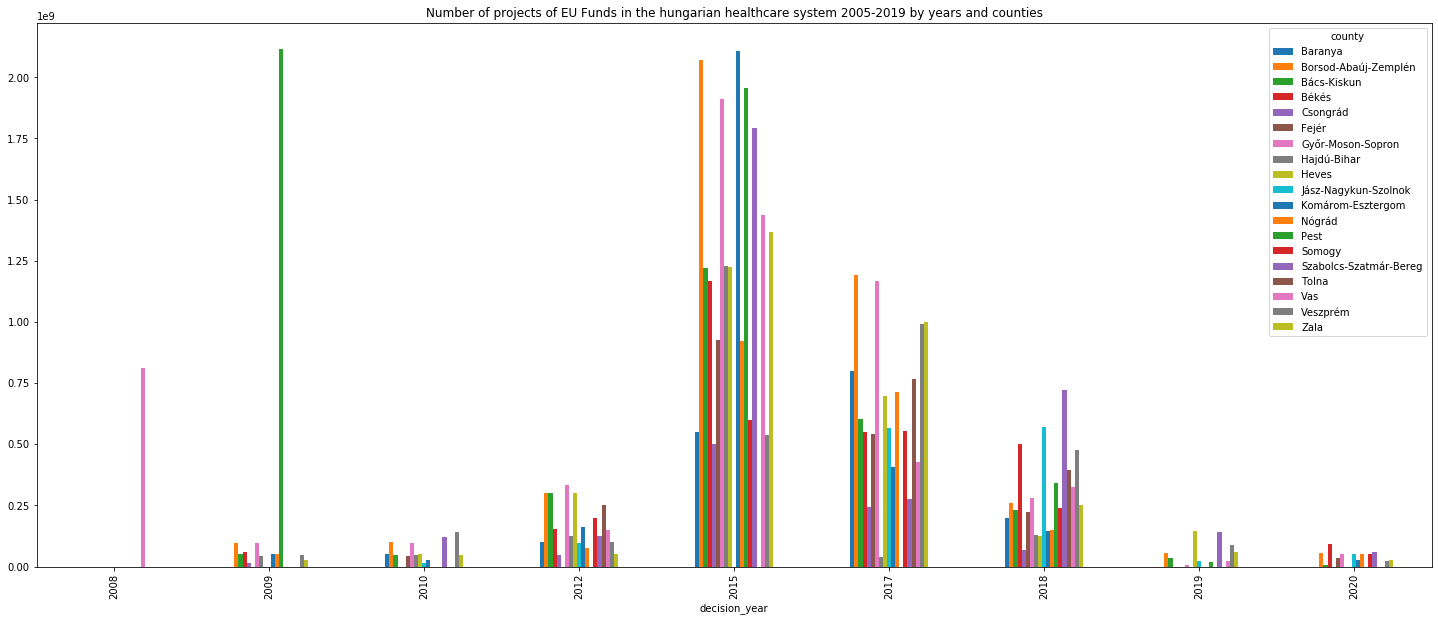

In [415]:
# Number of projects of EU Funds in the hungarian healthcare system 2005-2019 by years and counties
figure_count_county = sum_county_year.unstack(1).plot(kind='bar', figsize=(25,10),
                          title='Number of projects of EU Funds in the hungarian healthcare system 2005-2019 by years and counties');

In [416]:
#sum mean and number of the awarded grants by time and suppor_scheme
sum_year_scheme = row_data5.groupby(["decision_year","support_scheme_cat"])["grant_awarded"].sum()
mean_year_scheme = row_data5.groupby(["decision_year","support_scheme_cat"])["grant_awarded"].mean()
count_year_scheme = row_data5.groupby(["decision_year","support_scheme_cat"])["grant_awarded"].count()

print(sum_year_scheme)
print(mean_year_scheme) 
print(count_year_scheme)

decision_year  support_scheme_cat
2008           service                 812019991
2009           human resources         681476266
               infrastructure         2067587034
2010           human resources         142078981
               infrastructure           95925000
2012           human resources        2926373068
2014           service                 130000000
2015           equipment             30531303638
               infrastructure         1027050000
               service                  59646911
2017           equipment               814050819
               human resources        2384745180
               infrastructure         5954788950
               service                2490553771
2018           human resources        2887834577
               infrastructure         1186305093
               service                2944629595
2019           equipment               267118806
               human resources         155238390
               infrastructure      

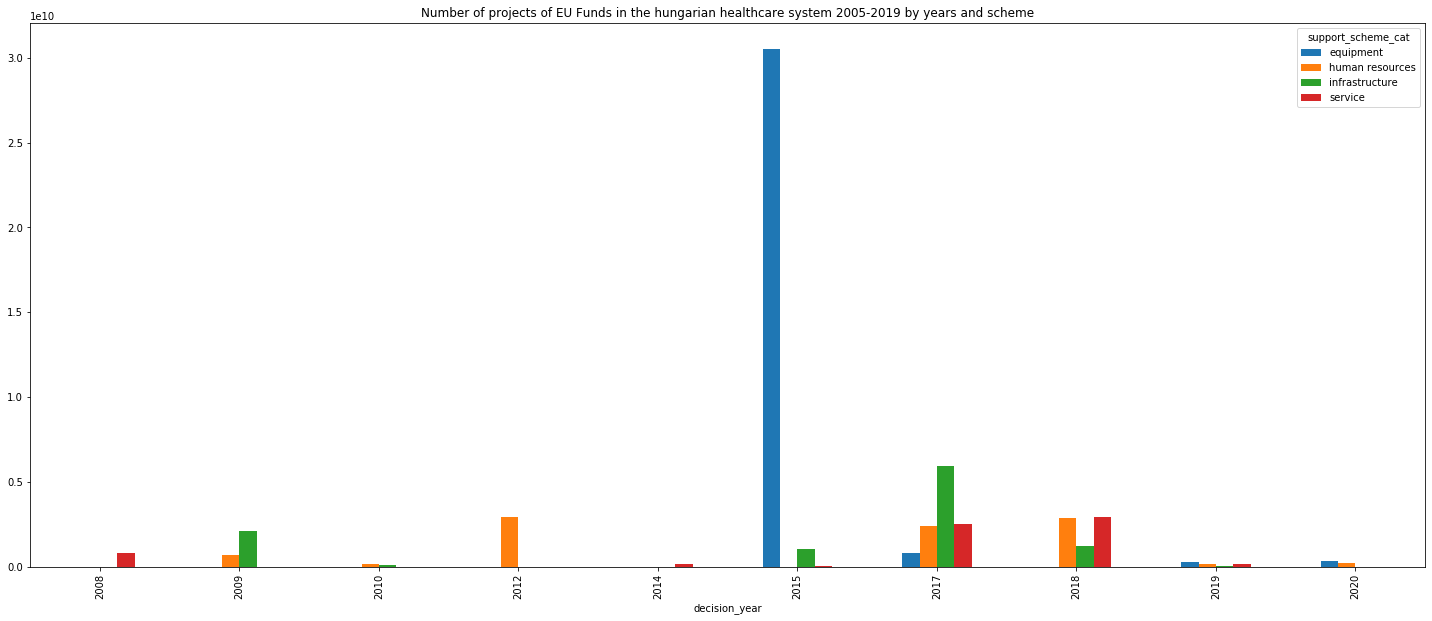

In [417]:
# Number of projects of EU Funds in the hungarian healthcare system 2005-2019 by years and counties
figure_count_county = sum_year_scheme.unstack(1).plot(kind='bar', figsize=(25,10),
                          title='Number of projects of EU Funds in the hungarian healthcare system 2005-2019 by years and scheme');

In [418]:
#sum mean and number of the awarded grants by time location and support_scheme
sum_county_scheme = row_data5.groupby(["county","support_scheme_cat"])["grant_awarded"].sum()
mean_county_scheme = row_data5.groupby(["county", "support_scheme_cat"])["grant_awarded"].mean()
count_county_scheme = row_data5.groupby(["county", "support_scheme_cat"])["grant_awarded"].count()

print(sum_county_scheme)
print(mean_county_scheme) 
print(count_county_scheme)

county                  support_scheme_cat
Baranya                 equipment              551217104
                        human resources        388305836
                        infrastructure         393651811
                        service                317036112
Borsod-Abaúj-Zemplén    equipment             2136425337
                        human resources        837590221
                        infrastructure         686232093
                        service                413100655
Bács-Kiskun             equipment             1273541763
                        human resources        702981481
                        infrastructure         432908555
                        service                 79966640
Békés                   equipment             1217083653
                        human resources        540467068
                        infrastructure         398652241
                        service                364004807
Csongrád                equipment            

In [419]:
#sum mean and number of the awarded grants by time, location and support_scheme
sum_county_year_scheme = row_data5.groupby(["county", "decision_year","support_scheme_cat"])["grant_awarded"].sum()
mean_county_year_scheme = row_data5.groupby(["county", "decision_year","support_scheme_cat"])["grant_awarded"].mean()
count_county_year_scheme = row_data5.groupby(["county", "decision_year","support_scheme_cat"])["grant_awarded"].count()

print(sum_county_year_scheme)
print(mean_county_year_scheme) 
print(count_county_year_scheme)

county                decision_year  support_scheme_cat
Baranya               2012           human resources         99447291
                      2015           equipment              492204094
                                     service                 59646911
                      2017           equipment               59013010
                                     human resources        288858545
                                     infrastructure         277250580
                                     service                176047650
                      2018           infrastructure         116401231
                                     service                 81341551
Borsod-Abaúj-Zemplén  2009           human resources         96993160
                      2010           human resources         50000000
                      2012           human resources        299724210
                      2015           equipment             2068655004
                      2017        